In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import time

In [2]:
sys.path.insert(1, os.path.join(os.path.dirname(os.getcwd()), "scripts") )

from model_utils import generate_model_input, preprocess_data, get_predictions, plot_results, mean_absolute_percentage_error

root_path = os.path.dirname(os.getcwd())

# Read forecasts

total length: 1392
Index(['ds', 'y', 'unique_id'], dtype='object')
time frequency: 1.0
0 1391


<Axes: xlabel='ds'>

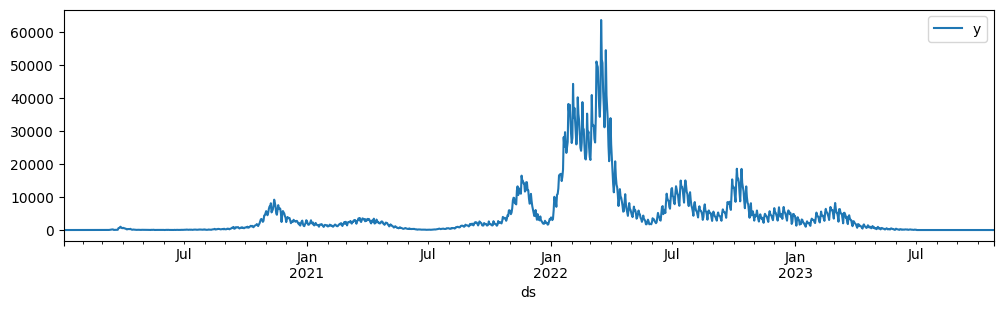

In [3]:
# First: Load dataframe and clean it
df = pd.read_csv(os.path.join(root_path, "data", "dataset2.csv"), parse_dates=True)
date_colname= "date"
target_colname = "target"
df[date_colname] = pd.to_datetime(df[date_colname])
df["unique_id"] = "dataset2"
df.rename(columns={date_colname: "ds", target_colname: "y"}, inplace=True)

df_left = pd.DataFrame()
df_left['ds'] = pd.date_range(start=df['ds'].min(), end=df['ds'].max(), freq='D')
cols = ['unique_id', 'ds', 'y']

df = pd.merge(df_left, df, how='left', on='ds')
df['y'] = df['y'].fillna(0)
df['unique_id'] = 'all'

print(f"total length: {df.shape[0]}")
print(df.columns)
print(f"time frequency: {df.index.diff()[1]}")
print(df.index[0], df.index[-1])
df[['ds', 'y']].set_index('ds').plot(figsize=(12, 3))

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

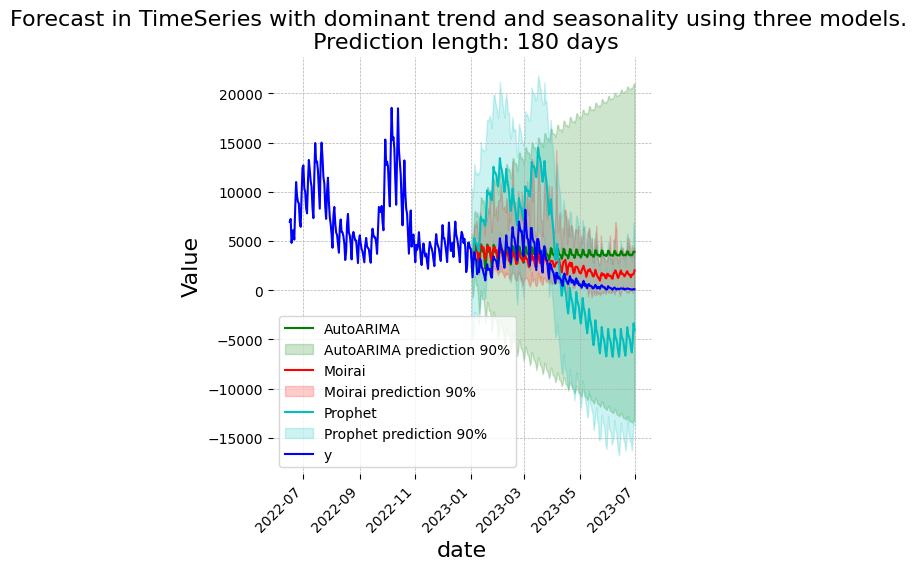

In [4]:
# create the train and test sets
train_window = 3 * 365  # days
prediction_window = 180  # days

train = df.iloc[:train_window, :].copy()
test = df.iloc[train_window:, :].copy()

# preds
predictions_df = pd.read_csv(os.path.join(root_path, "data", "forecaster_forecast_3_examples.csv"), parse_dates=True)
predictions_df['ds'] = pd.to_datetime(predictions_df['ds'])

# Merge predictions with original data
true_and_preds = pd.merge(test, predictions_df, on=['ds', 'unique_id'], how="right")
all_data = pd.concat([train.iloc[-200:, :], true_and_preds])
all_data.drop(columns=['unique_id'], inplace=True)

# Plot the results
figure = plot_results(
    results_df=all_data.set_index('ds'),
    target_colname='y',
    title=f"Forecast in TimeSeries with dominant trend and seasonality using three models. \n Prediction length: {prediction_window} days",
    figsize=(5, 6),
)
plt.show()

In [5]:
all_data

,ds,y,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90,Moirai,Moirai-lo-90,Moirai-hi-90,Prophet,Prophet-lo-90,Prophet-hi-90
895,2022-06-16,6958.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
896,2022-06-17,7239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
897,2022-06-18,4808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898,2022-06-19,5735.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899,2022-06-20,6122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
175,2023-06-26,89.0,3623.769699,-13305.729604,20553.269001,1305.3279,-80.052734,3544.9890,-5828.282343,-15386.086510,3364.039181
176,2023-06-27,50.0,3543.966365,-13436.863525,20524.796254,1585.2700,-14.158691,4584.9453,-6322.439085,-16284.430985,2966.916153
177,2023-06-28,65.0,3644.073507,-13379.754309,20667.901323,1579.6411,-263.828600,3344.8835,-5235.048891,-15182.644365,3724.025530
178,2023-06-29,126.0,3935.601216,-13129.707960,21000.910392,1661.2998,340.007800,4374.1790,-3364.114970,-13438.665762,6856.386568
